<a href="https://colab.research.google.com/github/rzkyadhi/Analyzing-Super-Bowl-TV-and-Halftime-Musicians-Data/blob/main/Analyzing_TV_Data%2C_Super_Bowls%2C_and_Halftime_Musicians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Main Object :**


> What are the most extreme game outcomes?

> How does the game affect television viewership?

> How have viewership, TV ratings, and ad cost evolved over time?

> Who are the most prolific musicians in terms of halftime show performances?












In [4]:
# Import the dataset
import pandas as pd

super_bowls = pd.read_csv("/content/drive/MyDrive/Project/DataCamp/Analyzing TV Data/super_bowls.csv")
halftime_musicians = pd.read_csv("/content/drive/MyDrive/Project/DataCamp/Analyzing TV Data/halftime_musician.csv")
tv = pd.read_csv("/content/drive/MyDrive/Project/DataCamp/Analyzing TV Data/tv.csv")

print("Super Bowls Data")
display(super_bowls.head())

print("Halftime Musician Data")
display(halftime_musicians.head())

print("TV Data")
display(tv.head())

Super Bowls Data


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


Halftime Musician Data


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


TV Data


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [5]:
super_bowls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

There is some **Missing Data** in column *qb_winner_2* and *qb_loser_2*

In [6]:
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


There is some **Missing Data** in column *num_songs*

In [7]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


There is some **Missing Data** in column *rating_18_49* and *ad_cost*

## ***Visualization of Dataset***

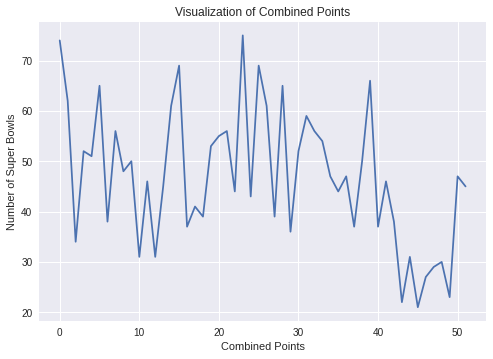

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

#Plot Histogram of combined points
plt.plot(super_bowls["combined_pts"])
plt.xlabel("Combined Points")
plt.ylabel("Number of Super Bowls")
plt.title("Visualization of Combined Points")
plt.show()

display(super_bowls[super_bowls["combined_pts"] > 70])
display(super_bowls[super_bowls["combined_pts"] < 25])

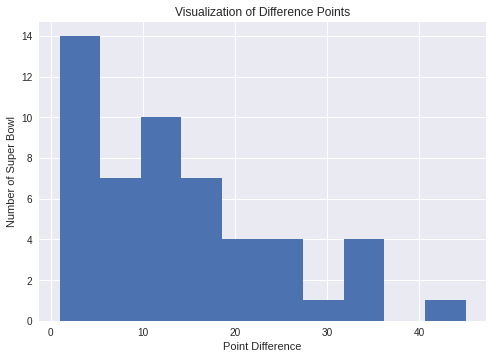

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
15,2003-01-26,37,Qualcomm Stadium,San Diego,California,67603,Tampa Bay Buccaneers,48,Brad Johnson,NaN,Jon Gruden,Oakland Raiders,21,Rich Gannon,NaN,Bill Callahan,69,27
17,2001-01-28,35,Raymond James Stadium,Tampa,Florida,71921,Baltimore Ravens,34,Trent Dilfer,NaN,Brian Billick,New York Giants,7,Kerry Collins,NaN,Jim Fassel,41,27
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
30,1988-01-31,22,Jack Murphy Stadium,San Diego,California,73302,Washington Redskins,42,Doug Williams,NaN,Joe Gibbs,Denver Broncos,10,John Elway,NaN,Dan Reeves,52,32
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36
34,1984-01-22,18,Tampa Stadium,Tampa,Florida,72920,Los Angeles Raiders,38,Jim Plunkett,NaN,Tom Flores,Washington Redskins,9,Joe Theismann,NaN,Joe Gibbs,47,29
51,1967-01-15,1,Memorial Coliseum,Los Angeles,California,61946,Green Bay Packers,35,Bart Starr,NaN,Vince Lombardi,Kansas City Chiefs,10,Len Dawson,NaN,Hank Stram,45,25


In [18]:
plt.hist(super_bowls.difference_pts)
plt.xlabel("Point Difference")
plt.ylabel("Number of Super Bowl")
plt.title("Visualization of Difference Points")
plt.show()

display(super_bowls[super_bowls["difference_pts"] == 1])
display(super_bowls[super_bowls["difference_pts"] >= 25])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


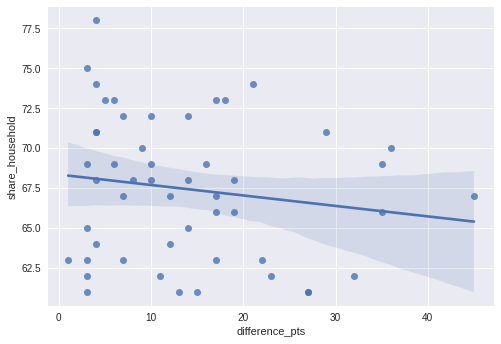

In [26]:
import seaborn as sns
games_tv = pd.merge(tv[tv["super_bowl"] > 1], super_bowls, on = "super_bowl")
sns.regplot(games_tv.difference_pts, games_tv.share_household)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


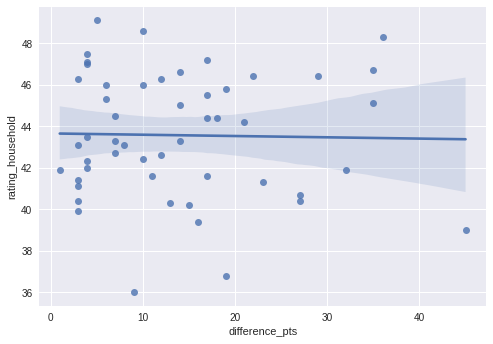

In [27]:
sns.regplot(games_tv.difference_pts, games_tv.rating_household)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


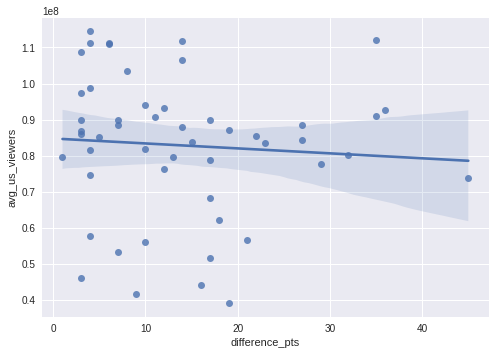

In [28]:
sns.regplot(games_tv.difference_pts, games_tv.avg_us_viewers)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


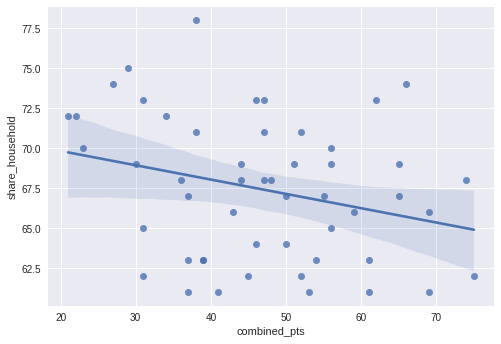

In [29]:
sns.regplot(games_tv.combined_pts, games_tv.share_household)

 ***Conclusion for Number 1 and 2***





> The most extreme game outcomes in terms of "higher combined_pts" and "higher difference_pts" is affecting the slightly drop for "share_household". Bigger of X Value means Lower of Y Value.

> The television viewership also affected because of combined points and difference points.

## ***Viewership and the ad industry over time***

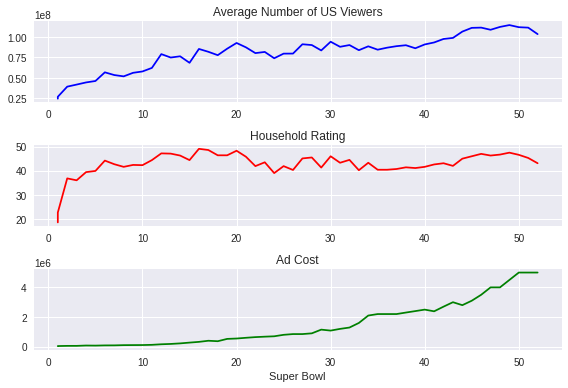

In [36]:
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color="blue")
plt.title("Average Number of US Viewers")

plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color="red")
plt.title("Household Rating")

plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color="green")
plt.title("Ad Cost")
plt.xlabel("Super Bowl")

plt.tight_layout()

**Conclusion of Number 3**

> The number of US Viewers grown per year since the super bowl 1 in 1967.

> The TV Rating have small fluctuation with up and down.

> The Ad Cost increase per year since the super bowl 1 in 1967.







## ***Halftime Shows***

In [40]:
halftime_appearances = halftime_musicians.groupby("musician").count()["super_bowl"].reset_index()
halftime_appearances = halftime_appearances.sort_values("super_bowl", ascending=False)
display(halftime_appearances)

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
...,...,...
37,Katy Perry,1
35,Judy Mallett,1
34,Jessica Simpson,1
33,Janet Jackson,1


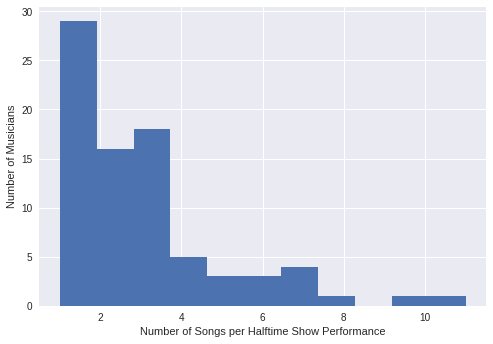

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
...,...,...,...
125,4,Marguerite Piazza,NaN
126,4,Doc Severinsen,NaN
127,4,Al Hirt,NaN
128,4,The Human Jukebox,NaN


In [47]:
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains("Marching")]
no_bands = no_bands[~no_bands.musician.str.contains("Spirit")]

most_songs = int(max(no_bands["num_songs"].values))
plt.hist(no_bands.num_songs.dropna(), bins = most_songs)
plt.xlabel("Number of Songs per Halftime Show Performance")
plt.ylabel("Number of Musicians")
plt.show()

no_bands = no_bands.sort_values("num_songs", ascending=False)
display(no_bands)

**Conclusions of Number 4**

> The most prolific musician is *Grambling State University Tiger Marching Band* with 6 appearance in super bowl.

> The most musician with highest number of song is *Justin Timberlake* with 11 songs.



